Sayan De

FT252082

EDA Assignment 2

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
from statsmodels.stats import weightstats as stests
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versions:

print("Pandas version :" , pd.__version__)
print("Numpy version: ", np.__version__)
from sklearn import __version__
print("scikitlearn version :",__version__)
from platform import python_version
print("Python version: ",python_version())

Pandas version : 2.2.2
Numpy version:  1.26.4
scikitlearn version : 1.5.2
Python version:  3.10.12


In [3]:
cars_data=pd.read_csv('/content/data.csv') # Loading csv data into a python data frame

In [4]:
cars_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
cars_data.shape

(11914, 16)

In [6]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
cars_data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


As MSRP col is the Target variable for our analysis we should exclude this during clustering

## Data Preprocessing
- Removing null values with KNN imputer

In [8]:
# Rows with Null values
engine_hp_null = cars_data[cars_data['Engine HP'].isnull()]
engine_hp_null

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,31950


In [9]:
engine_cyl_null = cars_data[cars_data['Engine Cylinders'].isnull()]
engine_cyl_null

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74,78,2031,49800


## Part 1 : Finding presensce of Natural Cluster

- For the electric cars the cylinders would be 0
- And for other missing value for Cylinders we can fill them using KNN imputer

In [10]:
# Assuming your DataFrame is named df
cars_data.loc[(cars_data['Engine Fuel Type'] == 'electric') & (cars_data['Engine Cylinders'].isnull()), 'Engine Cylinders'] = 0

In [11]:
from sklearn.impute import KNNImputer

In [12]:
cars_num = cars_data.select_dtypes(exclude = 'object')

In [13]:
cars_num.isnull().sum()

,0
Year,0
Engine HP,69
Engine Cylinders,20
Number of Doors,6
highway MPG,0
city mpg,0
Popularity,0
MSRP,0


- from the 30 missing values, 10 with Electric cars has been replaced with 0

- For the rest missing values we can replace them with KNN imputer

In [14]:
imputer = KNNImputer(n_neighbors=5, weights="distance")
cars_data_imputed_knn =  pd.DataFrame(imputer.fit_transform(cars_num), columns = cars_num.columns )

In [15]:
cars_data_imputed_knn.isnull().sum()

,0
Year,0
Engine HP,0
Engine Cylinders,0
Number of Doors,0
highway MPG,0
city mpg,0
Popularity,0
MSRP,0


In [16]:
# Final Dataframe
cars_data_imputed_knn.head(5)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011.0,335.0,6.0,2.0,26.0,19.0,3916.0,46135.0
1,2011.0,300.0,6.0,2.0,28.0,19.0,3916.0,40650.0
2,2011.0,300.0,6.0,2.0,28.0,20.0,3916.0,36350.0
3,2011.0,230.0,6.0,2.0,28.0,18.0,3916.0,29450.0
4,2011.0,230.0,6.0,2.0,28.0,18.0,3916.0,34500.0


- Now as all the mssing values has been removed, we can proceed with Cluster analysis
- Before that we should exclude the MSRP column, as that is our target variable

In [17]:
cars_data_lr = cars_data_imputed_knn.copy()

In [18]:
cars_data_imputed_knn.drop('MSRP', axis=1, inplace=True)

## Standardization

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cars_data_scaled = scaler.fit_transform(cars_data_imputed_knn)
cars_data_scaled = pd.DataFrame(cars_data_scaled, columns = cars_data_imputed_knn.columns)
cars_data_scaled.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity
0,0.081228,0.780740,0.210637,-1.629027,-0.071930,-0.081587,1.637604
1,0.081228,0.460321,0.210637,-1.629027,0.153737,-0.081587,1.637604
2,0.081228,0.460321,0.210637,-1.629027,0.153737,0.029680,1.637604
3,0.081228,-0.180516,0.210637,-1.629027,0.153737,-0.192853,1.637604
4,0.081228,-0.180516,0.210637,-1.629027,0.153737,-0.192853,1.637604


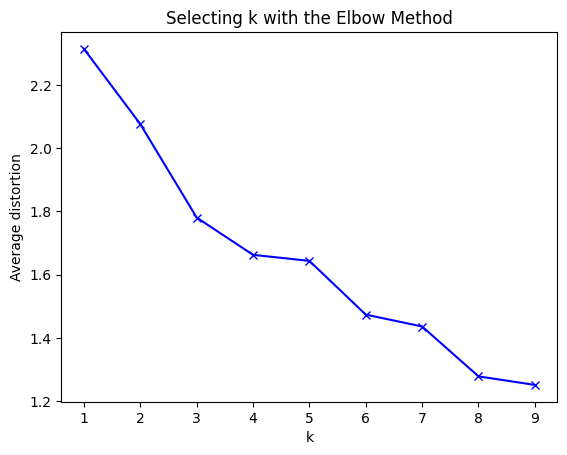

In [20]:
# Genrating elbow plot
# Finding the optimal number of clusters using Elbow method


clusters=range(1,10)  # creating one single cluster is useless, starting from two
meanDistortions=[] # array to hold within cluster variance, a.k.a inertia

for k in clusters:
    model= KMeans(n_clusters=k)
    model.fit(cars_data_scaled)
    prediction= model.predict(cars_data_scaled)
    meanDistortions.append(sum(np.min(cdist(cars_data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / cars_data_scaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')  # usign blue cross for every number of cluster value and mean distortion
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [21]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(cars_data_scaled)   # defines three clusters
prediction=final_model.predict(cars_data_scaled)  # captures which cluster each data point in the datset belongs to

#Append the prediction
cars_data_imputed_knn["Group"] = prediction  # creating a new column in the dataframe to reflect which cluster a record belongs to

There are 4 clusters and labels are 0,1,2,3(Group)

In [22]:
#frequency
cars_data_imputed_knn['Group'].value_counts()

,count
Group,
1,4468
2,3806
0,2549
3,1091


In [23]:
cars_data_imputed_knn.shape

(11914, 8)

In [24]:
cars_data_scaled.shape

(11914, 7)

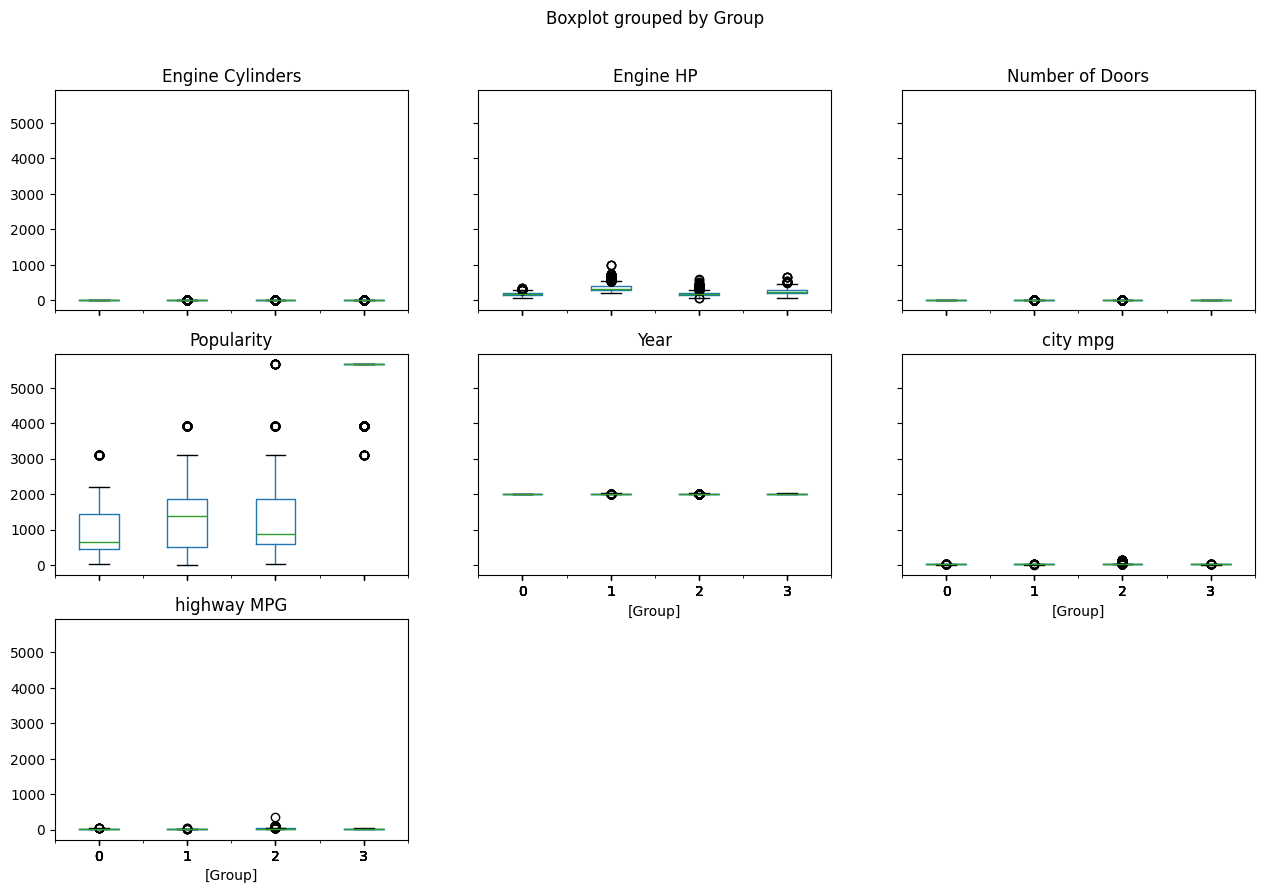

In [25]:
cars_data_imputed_knn.boxplot(by='Group',layout=(3,3),figsize=(15,10),grid=False)
plt.show()

### Finding: Lack of Natural Clusters

Upon analyzing the boxplots of various features, it is observed that there is significant overlap across the predefined groups (0, 1, 2, and 3) in most features. While City MPG, Highway MPG, and Engine HP show slight separation between certain groups, the majority of the features, including Engine Cylinders, Number of Doors, Popularity, and Year, display considerable overlap. This overlap suggests that there are no well-defined, natural clusters within the dataset.

## Part 2 : Feature Selection and Feature Engineering

(8.5, -0.5)

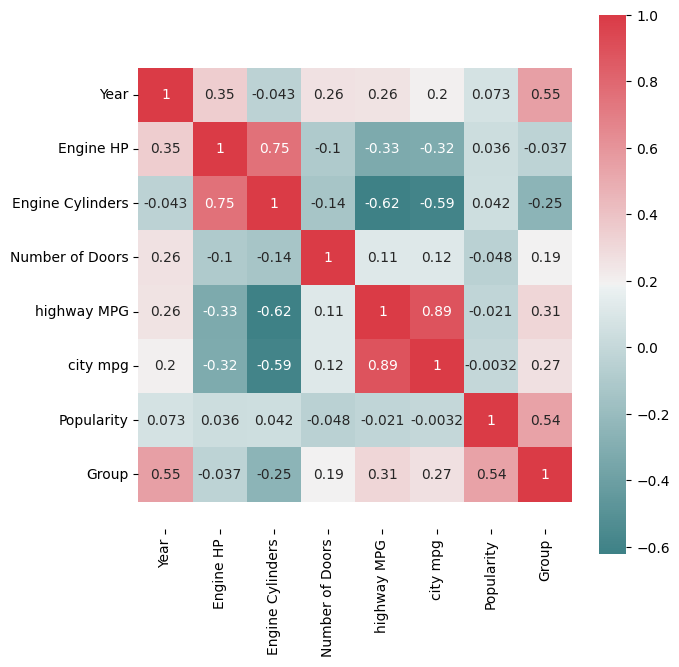

In [26]:
f, ax = plt.subplots(figsize=(7, 7))
corr=cars_data_imputed_knn.corr('pearson')
cp=sns.heatmap(corr,mask=np.zeros_like(corr,dtype=bool),cmap=sns.diverging_palette(200,10,as_cmap=True),square=True,ax=ax,annot=True)
bottom,top = cp.get_ylim()
cp.set_ylim(bottom+0.5,top-0.5) #matplotlib version to 3.1.1 has a bug in the plot and mistakes in the y-axis

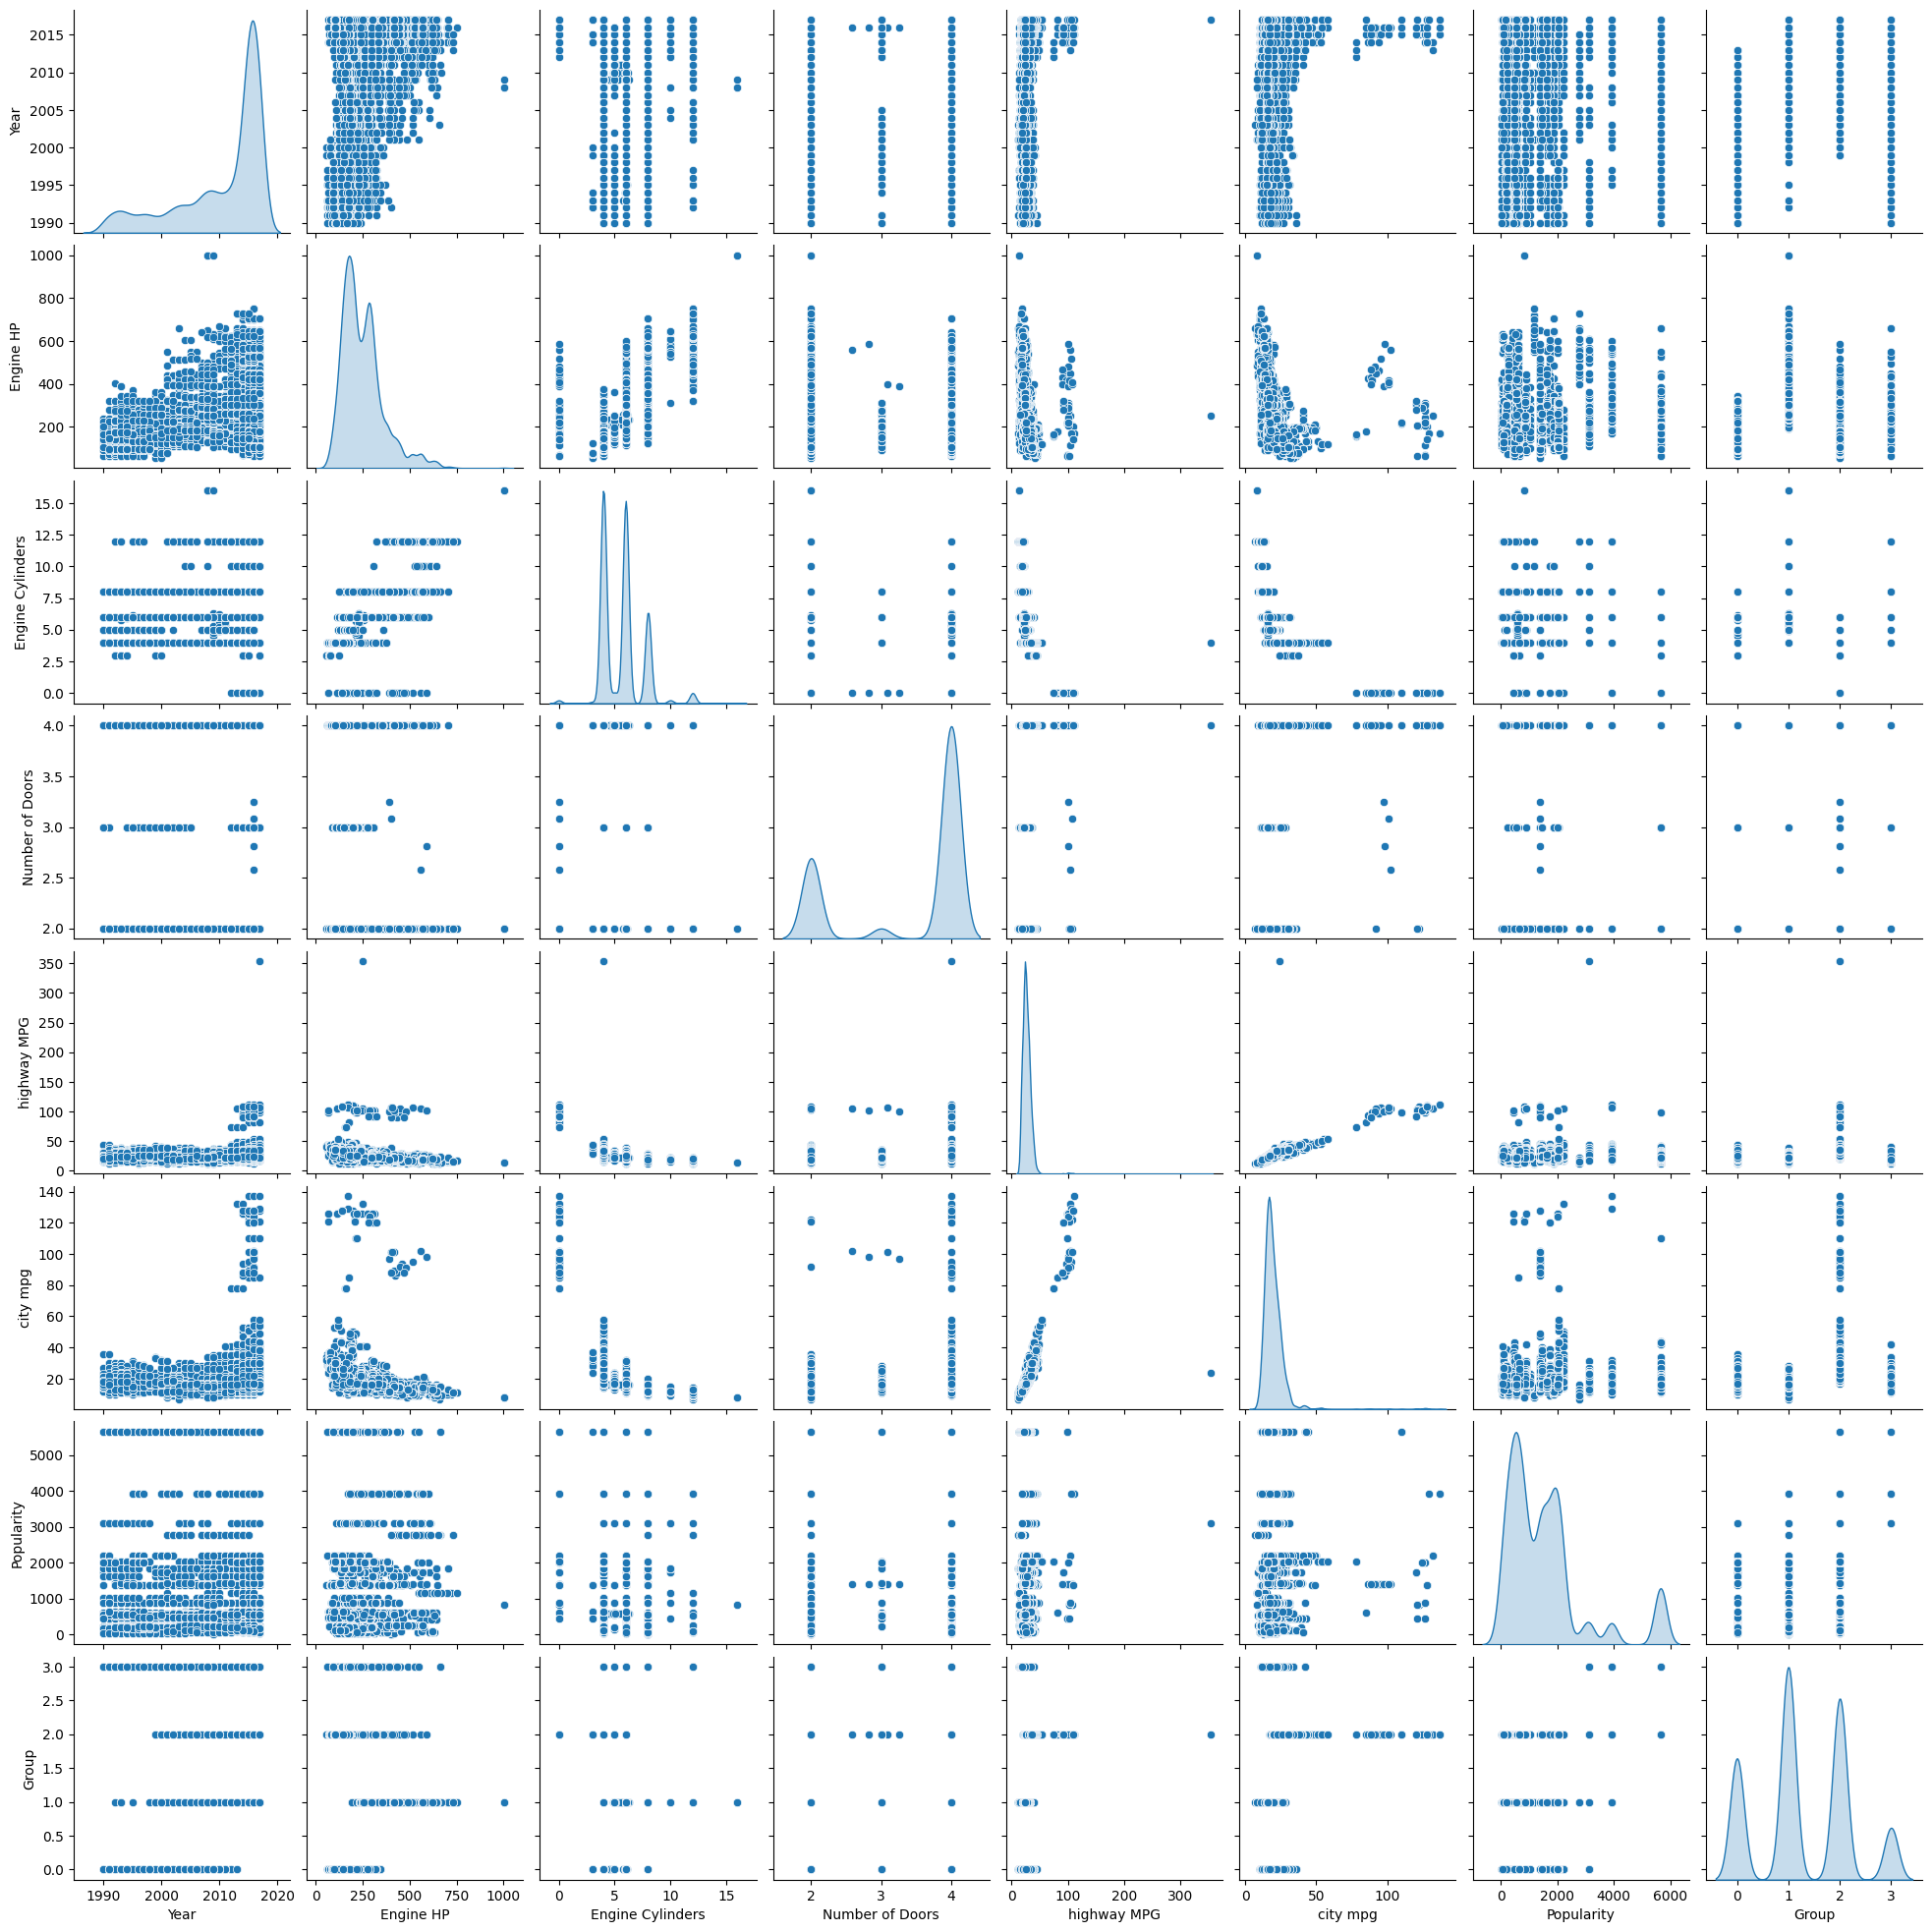

In [27]:
sns.pairplot(cars_data_imputed_knn,diag_kind='kde')

## Insights

Here’s the concise version with the values included:

- **(a) Best Features**: The selected features are `Year`, `Engine HP`, `Number of Doors`, `highway MPG`, and `Popularity`, chosen for their relevance and lower correlations. For example, `Engine HP` correlates with `Popularity` at 0.036, showing low redundancy.

- **(b) Multicollinearity**: High multicollinearity is observed with `Engine HP` & `Engine Cylinders` (0.75) and `highway MPG` & `city mpg` (0.89). We removed `Engine Cylinders` and `city mpg` to reduce redundancy and improve model stability.

- **(c) Weak but Strong Together**: `Year` (0.073 correlation with `Popularity`) and `Popularity` are weak individually but capture unique information, such as market trends, that strengthens the model when combined with other features.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
cars_data_lr

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011.0,335.0,6.0,2.0,26.0,19.0,3916.0,46135.0
1,2011.0,300.0,6.0,2.0,28.0,19.0,3916.0,40650.0
2,2011.0,300.0,6.0,2.0,28.0,20.0,3916.0,36350.0
3,2011.0,230.0,6.0,2.0,28.0,18.0,3916.0,29450.0
4,2011.0,230.0,6.0,2.0,28.0,18.0,3916.0,34500.0
...,...,...,...,...,...,...,...,...
11909,2012.0,300.0,6.0,4.0,23.0,16.0,204.0,46120.0
11910,2012.0,300.0,6.0,4.0,23.0,16.0,204.0,56670.0
11911,2012.0,300.0,6.0,4.0,23.0,16.0,204.0,50620.0
11912,2013.0,300.0,6.0,4.0,23.0,16.0,204.0,50920.0


###  In this Part we would be creating a Linear Regression model to predict the MSRP value based on different features(Engine HP, Popularity, Engine Cylinders etc)

In [30]:
scaler = StandardScaler()
cars_data_scaled = scaler.fit_transform(cars_data_imputed_knn)
cars_data_scaled = pd.DataFrame(cars_data_scaled, columns = cars_data_imputed_knn.columns)
cars_data_scaled.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Group
0,0.081228,0.780740,0.210637,-1.629027,-0.071930,-0.081587,1.637604,1.894056
1,0.081228,0.460321,0.210637,-1.629027,0.153737,-0.081587,1.637604,1.894056
2,0.081228,0.460321,0.210637,-1.629027,0.153737,0.029680,1.637604,1.894056
3,0.081228,-0.180516,0.210637,-1.629027,0.153737,-0.192853,1.637604,1.894056
4,0.081228,-0.180516,0.210637,-1.629027,0.153737,-0.192853,1.637604,1.894056


Baseline Model

In [31]:
# Splitting data into training and testing
X = cars_data_lr.drop('MSRP', axis=1)
y = cars_data_lr['MSRP']

# scaling the features before fitting into the model
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity
0,0.081228,0.780740,0.210637,-1.629027,-0.071930,-0.081587,1.637604
1,0.081228,0.460321,0.210637,-1.629027,0.153737,-0.081587,1.637604
2,0.081228,0.460321,0.210637,-1.629027,0.153737,0.029680,1.637604
3,0.081228,-0.180516,0.210637,-1.629027,0.153737,-0.192853,1.637604
4,0.081228,-0.180516,0.210637,-1.629027,0.153737,-0.192853,1.637604


In [32]:
#baseline model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Baseline model using all features
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predictions and performance on training and test sets
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)
print("Baseline Model Performance:")
print("Train RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

Baseline Model Performance:
Train RMSE: 46479.035380565285
Test RMSE: 32496.03318844298
Train R^2: 0.44889169568418785
Test R^2: 0.5569703501755445


## Feature Selction using Recursive feature Elimination

In [33]:
from sklearn.feature_selection import RFE

# Assuming X is your feature matrix and y is your target variable
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5, step=1)   # use recursive feature elimination to find the 3 top features that give the best logistic regression
fit = rfe.fit(X_scaled, y)
print(("Num Features: %d"), fit.n_features_)
print(("Selected Features: %s") % fit.support_)
print(("Feature Ranking: %s") % fit.ranking_)   #Most useful features are given rank 1

Num Features: %d 5
Selected Features: [False  True  True  True  True False  True]
Feature Ranking: [3 1 1 1 1 2 1]


In [34]:
feature_rank =  [(item, rank)
                 for item, rank in zip(X.columns, fit.ranking_)]

feature_rank

[('Year', 3),
 ('Engine HP', 1),
 ('Engine Cylinders', 1),
 ('Number of Doors', 1),
 ('highway MPG', 1),
 ('city mpg', 2),
 ('Popularity', 1)]

- So, according to the result from RFE we will remove the Year and city mpg attribute from the feature list

## Model 1 with Selected features(from RFE)

In [35]:
# Model 1 with selected features
selected_features = ['Engine HP','Engine Cylinders','Number of Doors', 'highway MPG', 'Popularity']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_1 = LinearRegression()
model_1.fit(X_train_selected, y_train)

# Predictions and performance for Model 1
y_train_pred_model1 = model_1.predict(X_train_selected)
y_test_pred_model1 = model_1.predict(X_test_selected)
print("\nModel 1 Performance (Selected Features):")
print("Train RMSE:", mean_squared_error(y_train, y_train_pred_model1, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_pred_model1, squared=False))
print("Train R^2:", r2_score(y_train, y_train_pred_model1))
print("Test R^2:", r2_score(y_test, y_test_pred_model1))


Model 1 Performance (Selected Features):
Train RMSE: 46572.21430356205
Test RMSE: 32347.27412749256
Train R^2: 0.4466798101959992
Test R^2: 0.5610172334605071



## comparison between the baseline model and the model after feature selection (Model 1):

### Baseline Model Performance
- **Train RMSE:** 46,479.04
- **Test RMSE:** 32,496.03
- **Train R²:** 0.4489
- **Test R²:** 0.5570

### Model 1 Performance (After RFE Feature Selection)
- **Train RMSE:** 46,572.21
- **Test RMSE:** 32,347.27
- **Train R²:** 0.4467
- **Test R²:** 0.5610

### Key Findings
1. **Test RMSE**: Model 1 has a slightly lower Test RMSE (32,347.27 vs. 32,496.03), indicating a minor improvement in predictive accuracy on unseen data.
  
2. **Test R²**: Model 1 has a marginally higher Test R² (0.5610 vs. 0.5570), suggesting a small improvement in the proportion of variance explained by the model on the test data.
  
3. **Train RMSE and R²**: There is a negligible increase in Train RMSE (46,572.21 vs. 46,479.04) and a minor decrease in Train R² (0.4467 vs. 0.4489), which implies that the model with selected features fits the training data almost as well as the baseline model.

4. **Feature Importance**: Using Recursive Feature Elimination (RFE), the most important features identified were 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG' and 'Popularity'. By focusing on these, the model complexity is reduced, potentially making it more interpretable without sacrificing much accuracy.

### Conclusion
The use of RFE for feature selection slightly improved the model’s performance on test data and resulted in a similar level of fit to the training data as the baseline model. The refined feature set could also contribute to a more streamlined model with less overfitting risk and improved interpretability.

## Part 3 : Principal Component Analysis

**(a) Effectiveness of PCA**
- PCA can be effective on the standardized dataset because there is noticeable collinearity among certain variables (e.g., **Engine HP & Engine Cylinders** with a correlation of** 0.75**, and **highway MPG & city mpg** with a correlation of **0.89**).

- Strong collinearity suggests that some variables contribute redundant information or **Noise**. PCA can reduce this redundancy by transforming correlated features into a set of uncorrelated principal components, which can simplify the model and reduce overfitting.

(b) Performing PCA

In [54]:
#standardized training set
X_train.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity
3181,0.740909,0.139903,-0.909281,0.640313,0.492237,0.252213,0.047919
5357,0.872845,1.824390,1.330555,0.640313,-0.974596,-0.637920,-0.650516
4874,0.740909,-0.702341,-0.909281,-1.629027,0.830737,0.586013,0.114502
8102,-2.293623,-0.638257,0.210637,-1.629027,-1.200263,-0.971720,0.205361
10400,-0.314580,-0.711495,0.210637,-1.629027,-0.297596,-0.304120,-0.080394


In [55]:
#covariance matrix
cov_matrix = np.cov(X_train.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.99056551  0.35160043 -0.04010892  0.26239045  0.25399656  0.19129845
   0.07311768]
 [ 0.35160043  1.00396489  0.75953793 -0.09811349 -0.33207042 -0.32485762
   0.03698629]
 [-0.04010892  0.75953793  0.99778273 -0.13524013 -0.60516134 -0.56883835
   0.04589683]
 [ 0.26239045 -0.09811349 -0.13524013  0.99314729  0.10686434  0.10474379
  -0.04329867]
 [ 0.25399656 -0.33207042 -0.60516134  0.10686434  0.97412584  0.81098655
  -0.02287023]
 [ 0.19129845 -0.32485762 -0.56883835  0.10474379  0.81098655  0.89325218
  -0.00816171]
 [ 0.07311768  0.03698629  0.04589683 -0.04329867 -0.02287023 -0.00816171
   1.00410329]]


In [56]:
# generating eigen value amnd eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.07545202  0.73343313  0.60878979  0.13419582 -0.25453847  0.05379288
  -0.00811252]
 [-0.42373903  0.48414205 -0.25311193 -0.18643884  0.62773701  0.30100382
   0.05069087]
 [-0.54110631  0.15712538 -0.4465172   0.16420637 -0.66750939  0.10279432
   0.00622622]
 [ 0.13987439  0.33661547 -0.33168043 -0.04077757  0.06533296 -0.6985221
  -0.51307791]
 [ 0.51368688  0.21026275 -0.31092388 -0.65462859 -0.27659524  0.27424421
   0.12242671]
 [ 0.48726362  0.17217678 -0.39222778  0.69962763  0.11870721  0.24353317
   0.12731093]
 [-0.03303476  0.12581211 -0.07350873 -0.02425066  0.02688685 -0.52295788
   0.83837971]]

 Eigen Values 
%s [2.72266125 1.46475922 0.46904613 0.11835768 0.12999383 0.92423154
 1.02789209]


In [57]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6
0,2.722661,1.464759,0.469046,0.118358,0.129994,0.924232,1.027892


In [58]:
print(eig_vecs[1])

[-0.42373903  0.48414205 -0.25311193 -0.18643884  0.62773701  0.30100382
  0.05069087]


In [59]:
#cumulative variance
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 39.70664115  61.06833964  76.05887229  89.5376442   96.37810094
  98.27389985 100.        ]


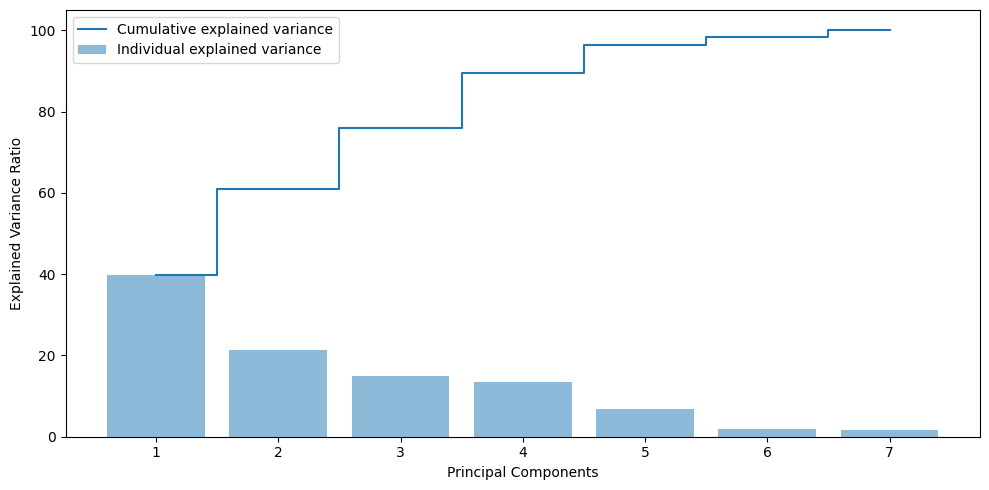

In [69]:
# Ploting the cumulative explained variance wrt no of principal components
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [61]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort(reverse=True)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]

In [62]:
eig_pairs[0]

(2.7226612461341873,
 array([ 0.07545202,  0.73343313,  0.60878979,  0.13419582, -0.25453847,
         0.05379288, -0.00811252]))

In [63]:
print(eigvalues_sorted[0])
print(eigvectors_sorted[0])

2.7226612461341873
[ 0.07545202  0.73343313  0.60878979  0.13419582 -0.25453847  0.05379288
 -0.00811252]


### Dimensionality Reduction

In [91]:
# Dimesionality reduction

P_reduce = np.array(eigvectors_sorted[0:5]).transpose()   # Selecting the top 5 eigen vectors from the 7

Proj_train_data = np.dot(X_train,P_reduce)   # projecting training data onto the 5 eigen vectors

Proj_test_data = np.dot(X_test,P_reduce)    # projecting test data onto the 5 eigen vectors

###  (c): Reduced Dimensions with PCA and Created Model 2

1. **Dimensionality Reduction**:
   - After performing PCA, we chose the top 5 principal components based on the cumulative explained variance, which covers a significant portion of the variance in the data.
   - By projecting the dataset onto these 5 components, we reduced dimensionality from 7 features to 5 principal components.

In [92]:
# complete matrix operation
print(y_train.shape)
X_train.shape, P_reduce.shape, Proj_train_data.shape

(9531,)


((9531, 7), (7, 5), (9531, 5))

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model_2 = LinearRegression()
model_2.fit(Proj_train_data, y_train)

r2_score(y_train, model_2.predict(Proj_train_data)), r2_score(y_test, model_2.predict(Proj_test_data))

(0.44275260881023903, 0.5387419932446371)


2. **Model 2 Performance**:
   - **Training \( R^2 \)**: 0.4428
   - **Testing \( R^2 \)**: 0.5387
   - **Comparison with Baseline and Model 1**:
     - **Baseline Model**: Training \( R^2 \) = 0.4488, Testing \( R^2 \) = 0.5569
     - **Model 1 (Selected Features)**: Training \( R^2 \) = 0.4354, Testing \( R^2 \) = 0.5610
     - **Model 2 (PCA)**: Training \( R^2 \) = 0.4428, Testing \( R^2 \) = 0.5387
   - **Interpretation**: Model 2 shows a slight reduction in \( R^2 \) scores compared to the baseline and Model 1, indicating that while PCA simplifies the model, it also loses some predictive accuracy.

### (d): Benefits and Drawbacks of PCA

1. **Dimensionality Reduction**: PCA reduced the dataset to the top 5 principal components, which helped retain the most informative features while lowering the dimensionality. This reduces the computational complexity and improves model interpretability.
2. **Collinearity Reduction**: By transforming the original features into uncorrelated principal components, PCA addressed multicollinearity, which is beneficial for linear regression models as it reduces redundant information.

### Drawbacks of PCA in the Context of This Analysis
1. **Loss of Interpretability**: After PCA, the new features (principal components) do not have a straightforward interpretation in terms of the original variables, making it harder to understand the influence of each feature on the outcome.
2. **Slightly Reduced R²**: The model's R² was slightly lower on the test set compared to the baseline model, indicating some loss of detailed information from the original features.
3. **Limited Performance Improvement**: The PCA-transformed model didn’t significantly outperform Model 1, suggesting that the original features selected for Model 1 might have already captured most of the variance, making PCA less impactful for this particular dataset.






### Final Conclusion

In this analysis, applying PCA did not significantly improve model performance compared to using a manually selected subset of features (Model 1). Although PCA helped reduce dimensionality and minimized multicollinearity, the performance metrics (R² and RMSE) for the PCA-based model (Model 2) were comparable to, but not markedly better than, the baseline and Model 1.

This suggests that:
- **Selected Features Were Already Effective**: The manually chosen features in Model 1 captured most of the important variance, making PCA's dimensionality reduction less impactful.
- **PCA’s Limited Impact on Performance**: For this specific dataset, where selected features already balanced complexity and relevance, PCA’s transformation did not add significant predictive power.
- **Interpretability Trade-off**: While PCA reduced the dimensionality, it also reduced interpretability by transforming original features into abstract principal components.

**Recommendation**: For this dataset, Model 1 (using selected features) is preferable over the PCA-transformed Model 2, as it offers similar performance without sacrificing interpretability.